In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
data = pd.read_csv("Heart_disease.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### In male column '1' signifies those instances are male and '0' signifies those instances are female. 

In [4]:
#data.rename(columns = {'male':'gender'},inplace=True)

In [5]:
#data.head()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data_work = data.copy()

In [8]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
data_work.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#lst = [currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','CVD']
#for i in lst:
#    data_work[i] = data_work[i].astype(dtype = 'bool')

#data_work['currentSmoker'] = data_work['currentSmoker'].astype(dtype = 'bool')
#data_work['BPMeds'] = data_work['BPMeds'].astype(dtype = 'bool')


In [11]:
#data_work['gender'].replace({1:'male',0:'female'}, inplace=True)

In [12]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [13]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
cor = data_work.corr()

In [15]:
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


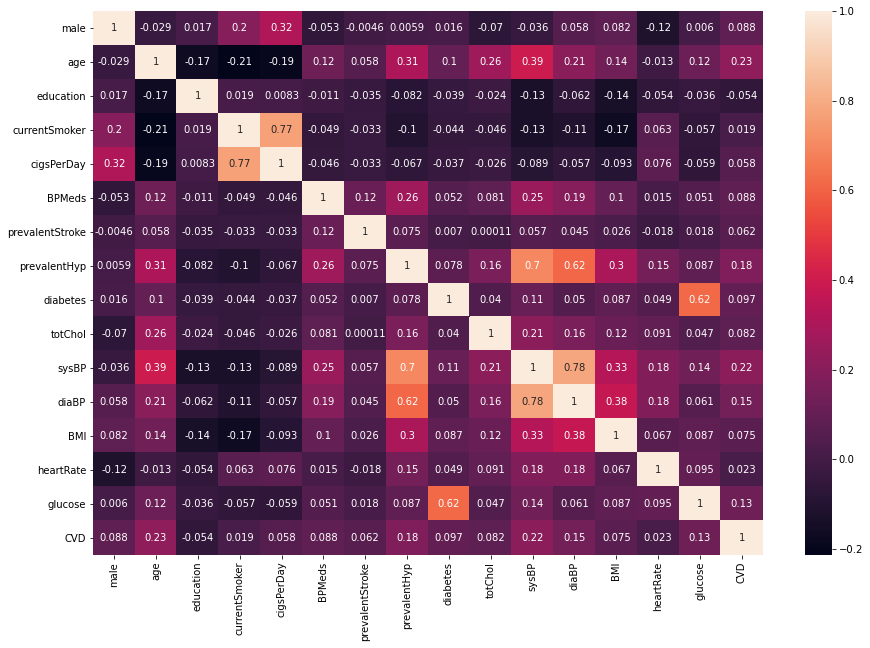

In [16]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(data_work.corr(), annot=True)

In [17]:
cor['CVD'].sort_values(ascending=False)

CVD                1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248
Name: CVD, dtype: float64

### We can see some correlation between 'cigsPerDay' and 'currentSmoker' as well as multicollinearity between 'sysBP' , 'diaBP' and 'sysBP' , 'prevalentHyp'

In [18]:
data_work.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD'],
      dtype='object')

### From sysBP and diaBP we can make a derived column Blood_Pressure and will remove these two features later.

In [19]:
data_work['Blood_Pressure'] = data_work['sysBP']/data_work['diaBP']

In [20]:
data_work['age'].value_counts()

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
49    132
54    132
56    123
57    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [21]:
data_work['age'].nunique()

39

In [22]:
data_work['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [23]:
data_work['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [24]:
data_work['male'].value_counts()

0    2420
1    1820
Name: male, dtype: int64

In [25]:
data_work['cigsPerDay'].value_counts()

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
16.0       3
12.0       3
13.0       3
45.0       3
19.0       2
14.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

In [26]:
data_work['cigsPerDay'].nunique()

33

In [27]:
data_work['cigsPerDay'].min(), data_work['cigsPerDay'].max()

(0.0, 70.0)

## EDA on Numerical columns

<AxesSubplot:xlabel='age', ylabel='count'>

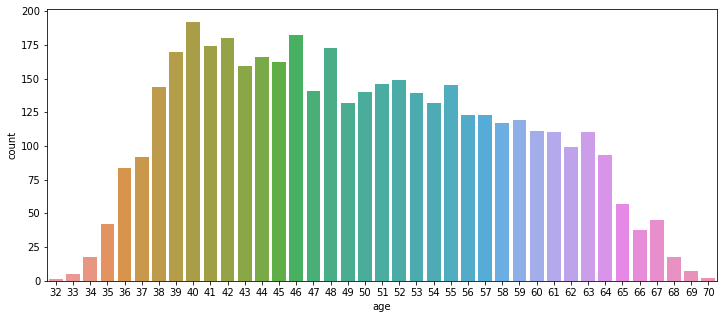

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x=data_work['age'], data=data_work)

### Inference: The count of people is gradually increasing from age of 32 upto 40 and then a slight decrease and few increase in count upto the age 52 and followed by decrease in count upto the age 70

## Boxplot and Histogram of all continuous attribute

<AxesSubplot:xlabel='age', ylabel='Count'>

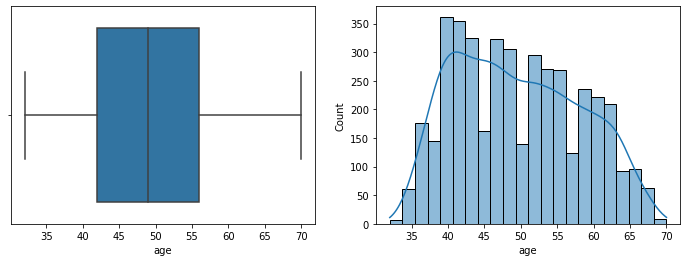

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='age', data=data_work, ax=axes[0])
sns.histplot(x='age', data=data_work, kde=True, ax=axes[1])

## No Outliers are there in Age attribute

<AxesSubplot:xlabel='cigsPerDay', ylabel='count'>

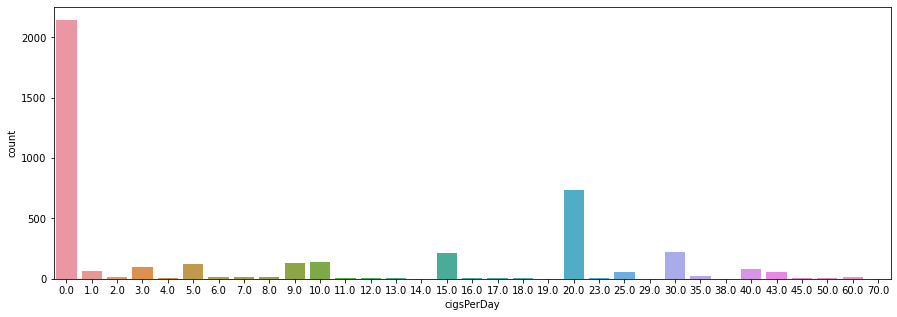

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_work['cigsPerDay'], data=data_work)

### Inference: We can see that the number of people taking no cigarette is highest and again it has a significant count at 20 cigarretes per day. The attribute shows right skewed distribution

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

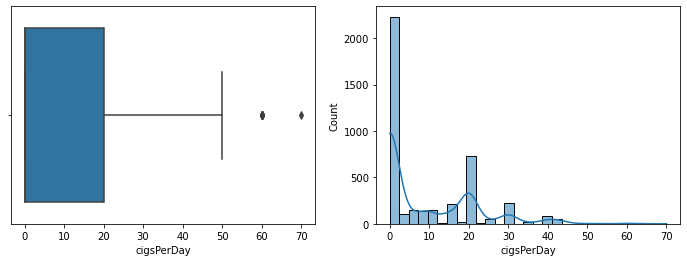

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='cigsPerDay', data=data_work, ax=axes[0])
sns.histplot(x='cigsPerDay', data=data_work, kde=True, ax=axes[1])
#sns.histplot(x='cigsPerDay', data=data_work, kde=True)

### Inference: Only 2 outliers are present for this attribute

In [32]:
data_work['BMI'].nunique()

1364

In [33]:
data_work['BMI'].value_counts()

22.19    18
22.54    18
22.91    18
23.48    18
25.09    16
         ..
35.78     1
19.37     1
31.29     1
34.91     1
39.60     1
Name: BMI, Length: 1364, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

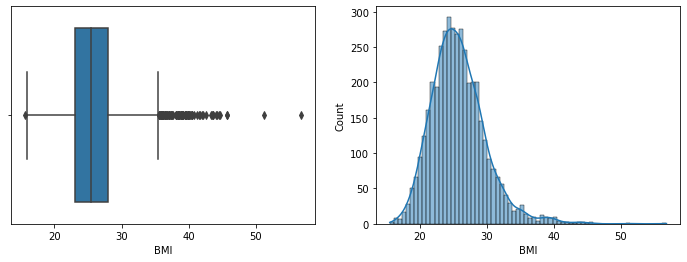

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='BMI', data=data_work, ax=axes[0])
sns.histplot(x='BMI', data=data_work, kde=True, ax=axes[1])

### Inference: The attribute has some outliers starting from the value approximately 35 and also has right skewed distribution

In [35]:
data_work['heartRate'].nunique()

73

<AxesSubplot:xlabel='heartRate', ylabel='count'>

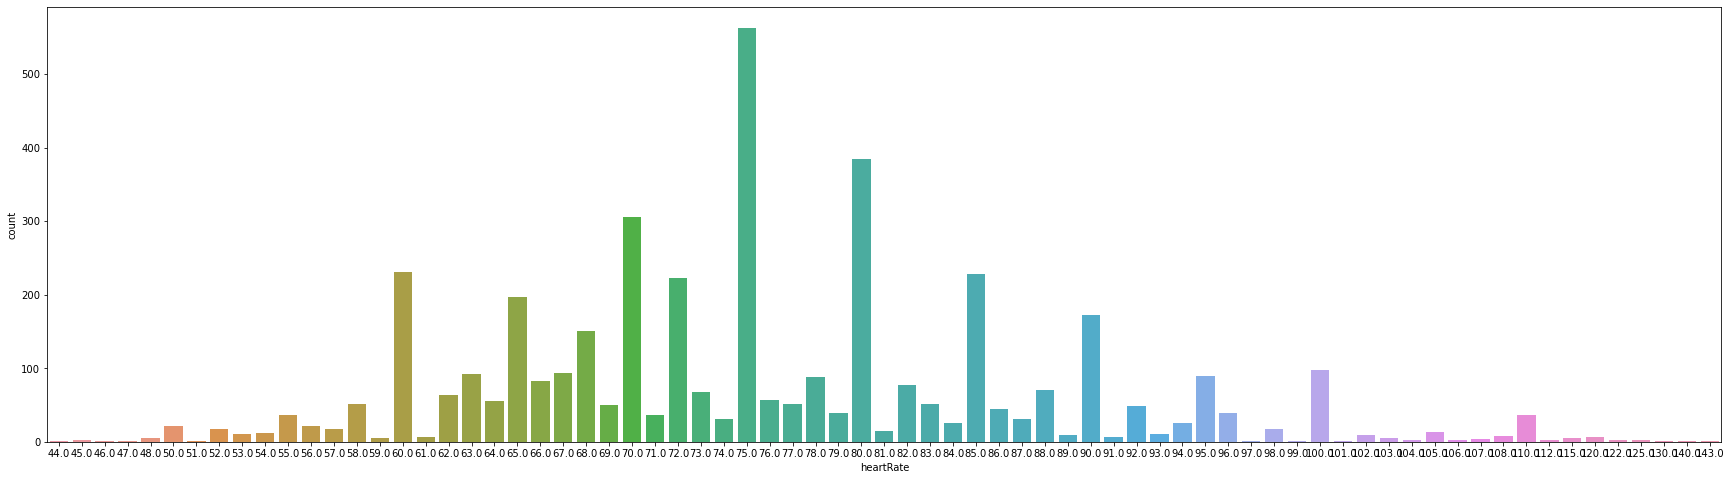

In [36]:
plt.figure(figsize=(30,8))
sns.countplot(x='heartRate', data=data_work)

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

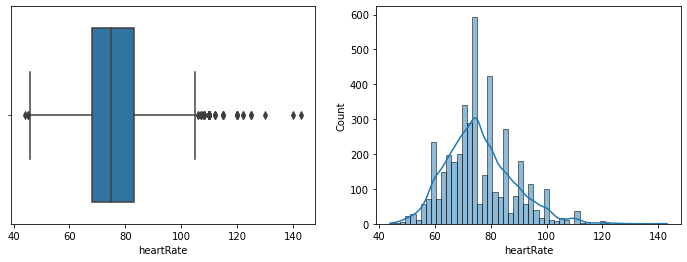

In [37]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='heartRate', data=data_work, ax=axes[0])
sns.histplot(x='heartRate', data=data_work, kde=True, ax=axes[1])

In [38]:
data_work['glucose'].nunique()

143

<AxesSubplot:xlabel='glucose', ylabel='Count'>

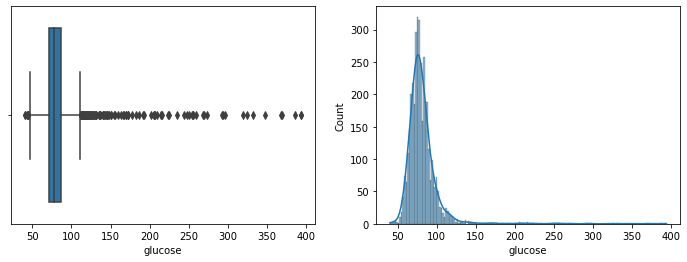

In [39]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='glucose', data=data_work, ax=axes[0])
sns.histplot(x='glucose', data=data_work, kde=True, ax=axes[1])

### Inference: Tnis attribute has high number of outliers and the attribute is showing right skewness

In [40]:
data_work['totChol'].nunique()

248

<AxesSubplot:xlabel='totChol', ylabel='Count'>

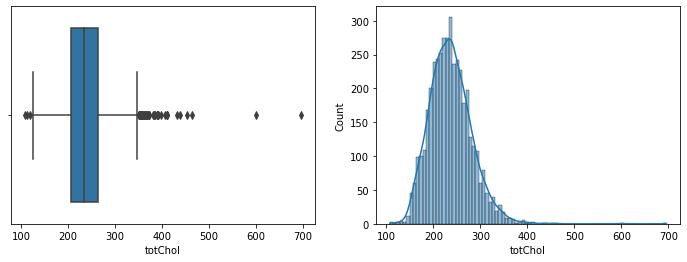

In [41]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='totChol', data=data_work, ax=axes[0])
sns.histplot(x='totChol', data=data_work, kde=True, ax=axes[1])

### Inference: This attribute has few outliers and is showing right skewness

In [42]:
data_work['sysBP'].nunique()

234

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

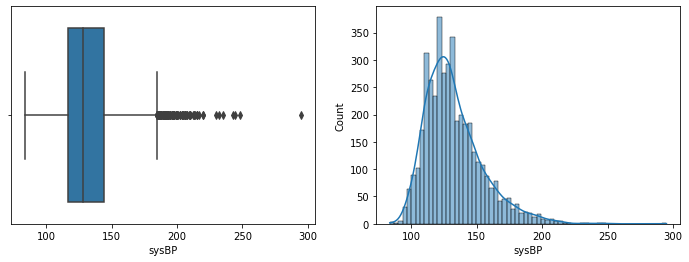

In [43]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='sysBP', data=data_work, ax=axes[0])
sns.histplot(x='sysBP', data=data_work, kde=True, ax=axes[1])

### Inference: This attribute has few outliers and is showing right skewness

In [44]:
data_work['diaBP'].nunique()

146

<AxesSubplot:xlabel='diaBP', ylabel='Count'>

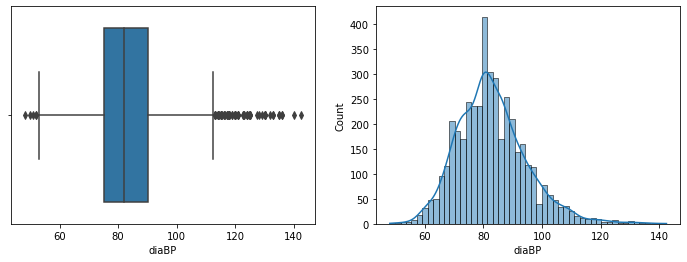

In [45]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='diaBP', data=data_work, ax=axes[0])
sns.histplot(x='diaBP', data=data_work, kde=True, ax=axes[1])

<AxesSubplot:xlabel='Blood_Pressure', ylabel='Count'>

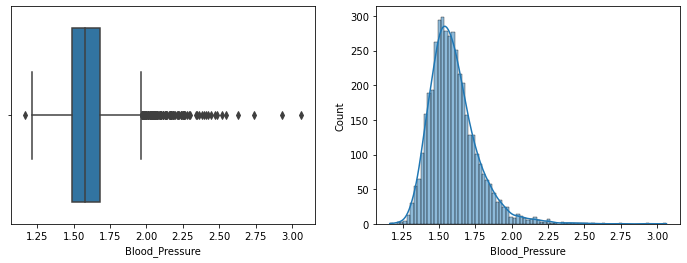

In [46]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='Blood_Pressure', data=data_work, ax=axes[0])
sns.histplot(x='Blood_Pressure', data=data_work, kde=True, ax=axes[1])

#### Observations: BMI, heartRate, glucose, totChol, sysBP, diaBP have some outliers and almost normally distributed having rightskewness. We can treat the outliers separately
#### The derived column Blood_Pressure is also having rightskewness and outliers

## EDA on categorical attributes

<AxesSubplot:xlabel='male', ylabel='count'>

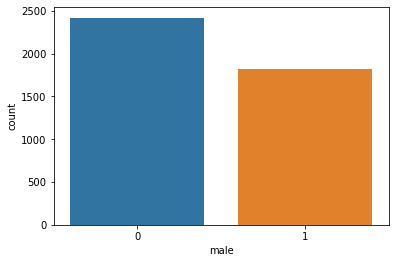

In [47]:
sns.countplot(x=data_work['male'], data=data_work)

In [48]:
data_work['male'].value_counts()

0    2420
1    1820
Name: male, dtype: int64

<AxesSubplot:xlabel='male', ylabel='count'>

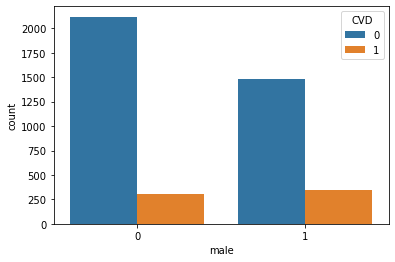

In [49]:
sns.countplot(x=data_work['male'], hue = data_work['CVD'],data=data_work)

### No of female is greater than no of males and count of male people without heart disease is higher than count of female without heart disease

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

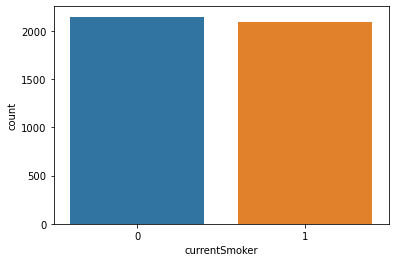

In [50]:
sns.countplot(x=data_work['currentSmoker'], data=data_work)

In [51]:
data_work['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

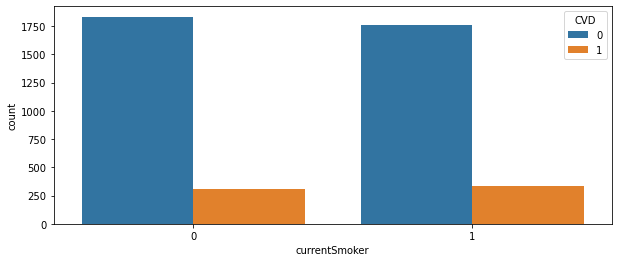

In [52]:
plt.figure(figsize=(10,4))
sns.countplot(x=data_work['currentSmoker'], hue = data_work['CVD'],data=data_work)

In [53]:
#data_work.groupby(by = 'currentSmoker')['CVD'].count()

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

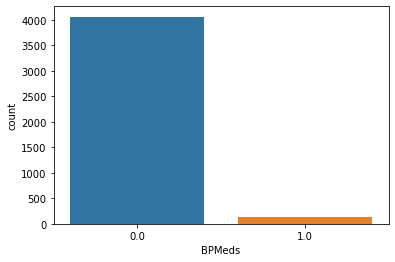

In [54]:
sns.countplot(x='BPMeds', data=data_work)

In [55]:
data_work['BPMeds'].value_counts(normalize=True)

0.0    0.970385
1.0    0.029615
Name: BPMeds, dtype: float64

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

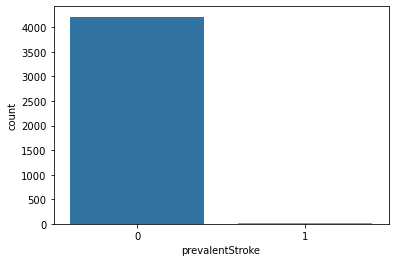

In [56]:
sns.countplot(x='prevalentStroke', data=data_work)

In [57]:
data_work['prevalentStroke'].value_counts(normalize=True)

0    0.994104
1    0.005896
Name: prevalentStroke, dtype: float64

In [58]:
# As prevalentStroke feature is extremely biased so we can drop this column. 
data_work = data_work.drop('prevalentStroke', axis=1)

In [59]:
data_work.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD,Blood_Pressure
0,1,39,4.0,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1.514286
1,0,46,2.0,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1.493827
2,1,48,1.0,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1.593750
3,0,61,3.0,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1.578947
4,0,46,3.0,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1.547619


In [60]:
data_work['prevalentHyp'].value_counts()

0    2923
1    1317
Name: prevalentHyp, dtype: int64

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

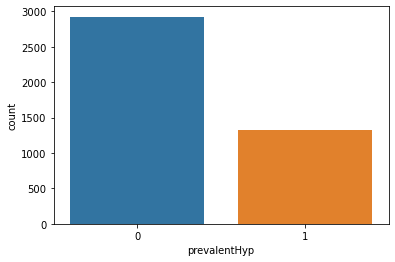

In [61]:
sns.countplot(x='prevalentHyp', data=data_work)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

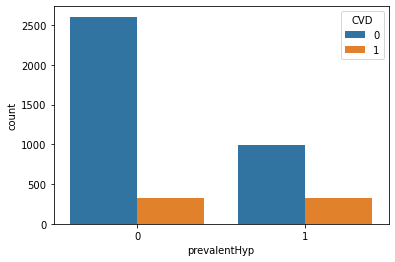

In [62]:
sns.countplot(x=data_work['prevalentHyp'], hue = data_work['CVD'],data=data_work)

In [63]:
data_work['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [64]:
#data_work.groupby(by='prevalentHyp')['CVD'].count()

<AxesSubplot:xlabel='diabetes', ylabel='count'>

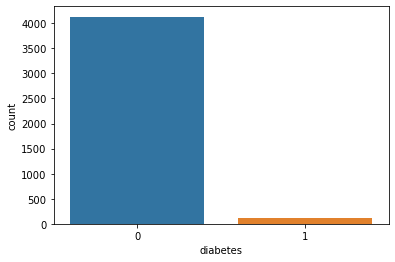

In [65]:
sns.countplot(x='diabetes', data=data_work)

In [66]:
data_work['diabetes'].value_counts(normalize=True)

0    0.974292
1    0.025708
Name: diabetes, dtype: float64

In [67]:
# As diabetes feature is extremely biased so we can drop this column. 
data_work = data_work.drop('diabetes', axis=1)

In [68]:
# As BPMeds feature is extremely biased so we can drop this column. 
data_work = data_work.drop('BPMeds', axis=1)

In [69]:
# We are keeping Blood_Pressure feature which is derived from sysBP and diaBP , instead of those
data_work = data_work.drop('sysBP', axis=1)
data_work = data_work.drop('diaBP', axis=1)

In [70]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
0,1,39,4.0,0,0.0,0,195.0,26.97,80.0,77.0,0,1.514286
1,0,46,2.0,0,0.0,0,250.0,28.73,95.0,76.0,0,1.493827
2,1,48,1.0,1,20.0,0,245.0,25.34,75.0,70.0,0,1.593750
3,0,61,3.0,1,30.0,1,225.0,28.58,65.0,103.0,1,1.578947
4,0,46,3.0,1,23.0,0,285.0,23.10,85.0,85.0,0,1.547619


## Checking the count of categories in target(CVD) feature

<AxesSubplot:xlabel='CVD', ylabel='count'>

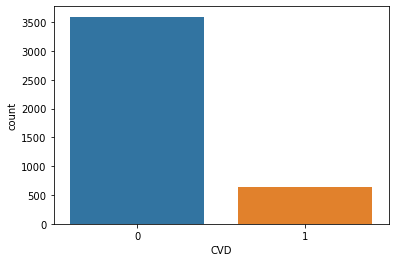

In [71]:
sns.countplot(x='CVD', data=data_work)

In [72]:
data_work['CVD'].value_counts(normalize=True)

0    0.848113
1    0.151887
Name: CVD, dtype: float64

In [73]:
data_work['age'].nunique()

39

In [74]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
0,1,39,4.0,0,0.0,0,195.0,26.97,80.0,77.0,0,1.514286
1,0,46,2.0,0,0.0,0,250.0,28.73,95.0,76.0,0,1.493827
2,1,48,1.0,1,20.0,0,245.0,25.34,75.0,70.0,0,1.593750
3,0,61,3.0,1,30.0,1,225.0,28.58,65.0,103.0,1,1.578947
4,0,46,3.0,1,23.0,0,285.0,23.10,85.0,85.0,0,1.547619


In [75]:
data_work.shape

(4240, 12)

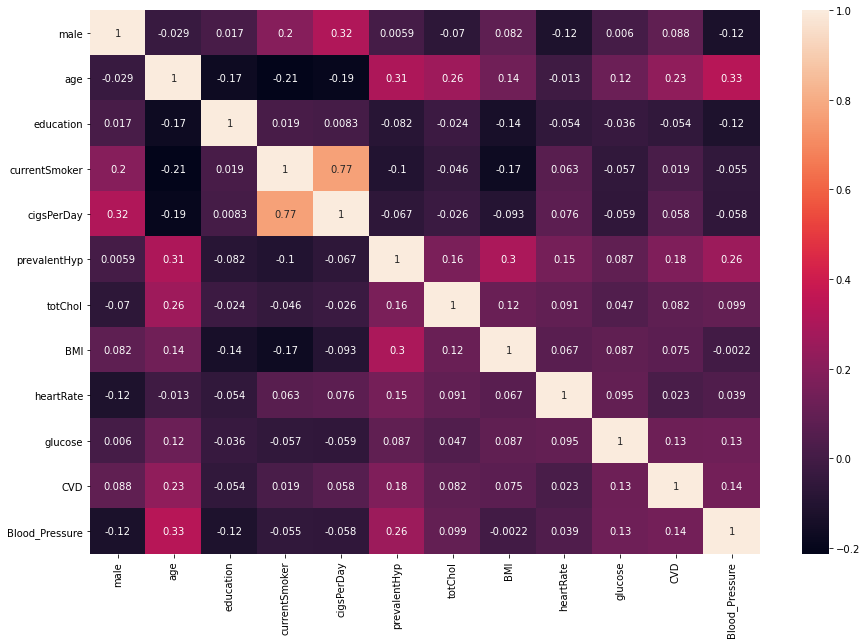

In [76]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(data_work.corr(), annot=True)

In [77]:
data_work.corr()['CVD'].sort_values(ascending=False)

CVD               1.000000
age               0.225408
prevalentHyp      0.177458
Blood_Pressure    0.144583
glucose           0.125590
male              0.088374
totChol           0.082369
BMI               0.075300
cigsPerDay        0.057755
heartRate         0.022907
currentSmoker     0.019448
education        -0.054248
Name: CVD, dtype: float64

In [78]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   male            4240 non-null   int64  
 1   age             4240 non-null   int64  
 2   education       4135 non-null   float64
 3   currentSmoker   4240 non-null   int64  
 4   cigsPerDay      4211 non-null   float64
 5   prevalentHyp    4240 non-null   int64  
 6   totChol         4190 non-null   float64
 7   BMI             4221 non-null   float64
 8   heartRate       4239 non-null   float64
 9   glucose         3852 non-null   float64
 10  CVD             4240 non-null   int64  
 11  Blood_Pressure  4240 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 397.6 KB


<AxesSubplot:xlabel='age'>

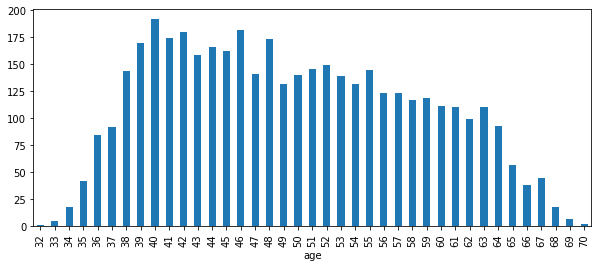

In [79]:
plt.figure(figsize=(10,4))
data_work.groupby(by = 'age')['CVD'].count().plot(kind='bar')

## Checking the null values

In [80]:
data_work.isnull().sum()

male                0
age                 0
education         105
currentSmoker       0
cigsPerDay         29
prevalentHyp        0
totChol            50
BMI                19
heartRate           1
glucose           388
CVD                 0
Blood_Pressure      0
dtype: int64

In [81]:
print("percentage of null value in glucose: ",(388/4240)*100)

percentage of null value in glucose:  9.150943396226415


### As the attribute having maximum number of null values contribute more than 5%(9.15%) so we can't drop the null values instead we are imputing them. As all the null values are found in the numerical attributes so we are going to impute them using median instead of mean as mean is impacted by outliers

In [82]:
data_work['education']=='NA'

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Name: education, Length: 4240, dtype: bool

In [83]:
#data_work.loc[33,:]

In [84]:
data_work['education'].dtype

dtype('float64')

In [85]:
data_work[data_work['education'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
33,1,61,NaN,1,5.0,0,175.0,18.59,72.0,75.0,1,1.624242
36,1,56,NaN,0,0.0,0,257.0,28.09,72.0,75.0,0,1.504902
72,0,37,NaN,0,0.0,0,200.0,33.29,67.0,87.0,0,1.506329
184,1,67,NaN,0,0.0,0,257.0,25.95,65.0,69.0,0,1.851852
213,0,34,NaN,0,0.0,0,163.0,23.88,73.0,80.0,0,1.507042
...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,1,254.0,31.98,75.0,69.0,0,1.510989
4098,1,37,NaN,1,20.0,0,184.0,22.16,85.0,63.0,0,1.395062
4121,0,55,NaN,0,0.0,0,240.0,26.27,72.0,NaN,0,1.510417
4122,1,69,NaN,1,23.0,1,186.0,26.64,72.0,67.0,0,1.924731


In [86]:
data_null_edu = data_work[data_work['education'].isnull()]

In [87]:
data_null_edu

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
33,1,61,NaN,1,5.0,0,175.0,18.59,72.0,75.0,1,1.624242
36,1,56,NaN,0,0.0,0,257.0,28.09,72.0,75.0,0,1.504902
72,0,37,NaN,0,0.0,0,200.0,33.29,67.0,87.0,0,1.506329
184,1,67,NaN,0,0.0,0,257.0,25.95,65.0,69.0,0,1.851852
213,0,34,NaN,0,0.0,0,163.0,23.88,73.0,80.0,0,1.507042
...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,1,254.0,31.98,75.0,69.0,0,1.510989
4098,1,37,NaN,1,20.0,0,184.0,22.16,85.0,63.0,0,1.395062
4121,0,55,NaN,0,0.0,0,240.0,26.27,72.0,NaN,0,1.510417
4122,1,69,NaN,1,23.0,1,186.0,26.64,72.0,67.0,0,1.924731


In [88]:
data_null_edu['CVD'].value_counts(normalize=True)

0    0.847619
1    0.152381
Name: CVD, dtype: float64

## Inference: The ratio of the persons having CVD and non-CVD is maintained in the original data as well as in the data having education as null

In [89]:
education_mode = data_work['education'].mode()

In [90]:
education_mode[0]

1.0

In [91]:
data_work['education'].fillna(value=education_mode[0], inplace=True)

In [92]:
data_work.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         29
prevalentHyp        0
totChol            50
BMI                19
heartRate           1
glucose           388
CVD                 0
Blood_Pressure      0
dtype: int64

In [93]:
data_work['cigsPerDay'].describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [94]:
data_work['totChol'].describe()

count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [95]:
data_work['BMI'].describe()

count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [96]:
data_work['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [97]:
data_work['heartRate'].describe()

count    4239.000000
mean       75.878981
std        12.025348
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

## Imputing Null values of all numeric columns using median

In [98]:
data_work['cigsPerDay'].fillna(value=data_work['cigsPerDay'].median(), inplace=True)
data_work['totChol'].fillna(value=data_work['totChol'].median(), inplace=True)
data_work['BMI'].fillna(value=data_work['BMI'].median(), inplace=True)
data_work['glucose'].fillna(value=data_work['glucose'].median(), inplace=True)
data_work['heartRate'].fillna(value=data_work['heartRate'].median(),inplace=True)

In [99]:
data_work.isnull().sum()

male              0
age               0
education         0
currentSmoker     0
cigsPerDay        0
prevalentHyp      0
totChol           0
BMI               0
heartRate         0
glucose           0
CVD               0
Blood_Pressure    0
dtype: int64

## User Defined function for Outlier Treatment 

In [100]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(data_work[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in data_work[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)

In [102]:
outlier_detection('cigsPerDay')

{'count': 4240.0, 'mean': 8.94433962264151, 'std': 11.90477734169414, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 20.0, 'max': 70.0}
Q1 : 0.0
Q3 : 20.0
Inter quartile range is  20.0
The lower limit is  -30
The upper limit is  50


In [103]:
data_work.loc[((data_work['cigsPerDay'] >= 50) & (data_work['cigsPerDay'] <= 70)), 'cigsPerDay']= round(upper_lim)

Text(0.5, 0, 'Histogram of cigsPerDay after outlier treatment')

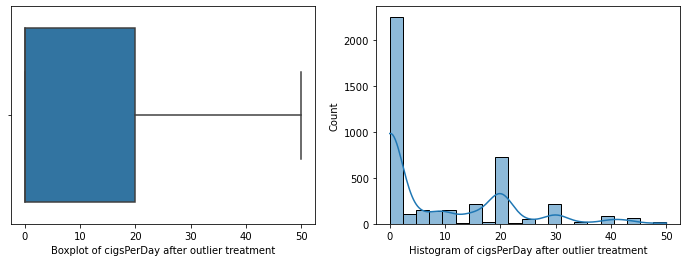

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='cigsPerDay', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of cigsPerDay after outlier treatment')
sns.histplot(x='cigsPerDay', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of cigsPerDay after outlier treatment')

In [105]:
outliers.clear()
outlier_detection('BMI')

{'count': 4240.0, 'mean': 25.79900471698112, 'std': 4.070774635557685, 'min': 15.54, '25%': 23.0775, '50%': 25.4, '75%': 28.0325, 'max': 56.8}
Q1 : 23.0775
Q3 : 28.0325
Inter quartile range is  4.954999999999998
The lower limit is  16
The upper limit is  35


In [106]:
data_work.loc[((data_work['BMI'] >= 35) & (data_work['BMI'] <= 56.8)), 'BMI']= round(upper_lim)

In [107]:
data_work.loc[(data_work['BMI'] <= 16),'BMI'] = round(lower_lim)

Text(0.5, 0, 'Histogram of BMI after outlier treatment')

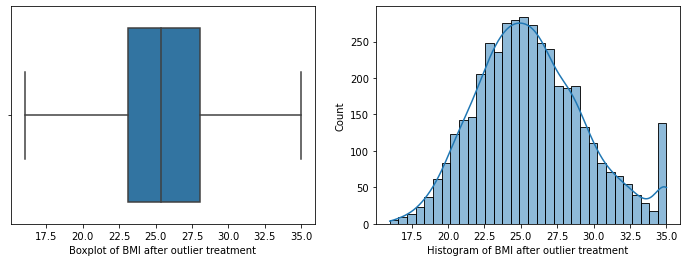

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='BMI', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of BMI after outlier treatment')
sns.histplot(x='BMI', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of BMI after outlier treatment')

In [110]:
data_work['BMI'].skew()

0.3985688991675701

In [111]:
data_work.loc[(data_work['BMI']) == 35]

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
35,1,37,2.0,0,0.0,1,225.0,35.0,95.0,83.0,0,1.345946
37,1,52,1.0,0,0.0,1,178.0,35.0,75.0,225.0,0,1.632653
78,0,45,1.0,0,0.0,1,183.0,35.0,80.0,63.0,0,1.495050
87,0,61,2.0,1,1.0,1,326.0,35.0,57.0,78.0,0,1.923077
108,0,66,1.0,0,0.0,1,278.0,35.0,90.0,84.0,1,2.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
4152,0,57,1.0,0,0.0,1,212.0,35.0,65.0,85.0,0,1.729412
4168,0,62,1.0,0,0.0,1,325.0,35.0,75.0,81.0,0,1.666667
4190,0,41,1.0,0,0.0,1,229.0,35.0,75.0,92.0,0,1.685393
4215,0,63,1.0,0,0.0,1,236.0,35.0,78.0,79.0,0,1.890244


In [109]:
outliers.clear()
outlier_detection('heartRate')

{'count': 4240.0, 'mean': 75.87877358490566, 'std': 12.023937060119858, 'min': 44.0, '25%': 68.0, '50%': 75.0, '75%': 83.0, 'max': 143.0}
Q1 : 68.0
Q3 : 83.0
Inter quartile range is  15.0
The lower limit is  46
The upper limit is  106


In [110]:
data_work.loc[((data_work['heartRate'] >= 106) & (data_work['heartRate'] <= 143)), 'heartRate']= round(upper_lim)

In [111]:
data_work.loc[(data_work['heartRate'] <= 46),'heartRate'] = round(lower_lim)

Text(0.5, 0, 'Histogram of heartRate after outlier treatment')

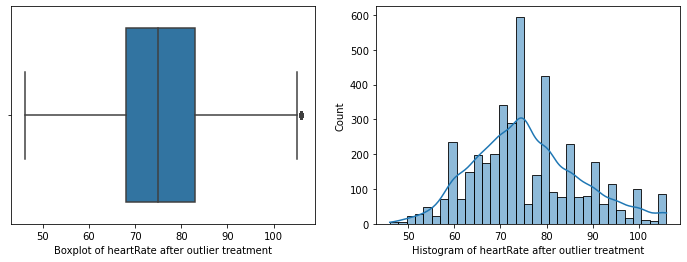

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='heartRate', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of heartRate after outlier treatment')
sns.histplot(x='heartRate', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of heartRate after outlier treatment')

In [113]:
data_work['heartRate'].skew()

0.4141235191368489

In [114]:
outliers.clear()
outlier_detection('glucose')

{'count': 4240.0, 'mean': 81.60094339622641, 'std': 22.860339880961636, 'min': 40.0, '25%': 72.0, '50%': 78.0, '75%': 85.0, 'max': 394.0}
Q1 : 72.0
Q3 : 85.0
Inter quartile range is  13.0
The lower limit is  52
The upper limit is  104


In [115]:
data_work.loc[((data_work['glucose'] >= 104) & (data_work['glucose'] <= 394)), 'glucose']= round(upper_lim)

In [116]:
data_work.loc[(data_work['glucose'] <= 52),'glucose'] = round(lower_lim)

Text(0.5, 0, 'Histogram of glucose after outlier treatment')

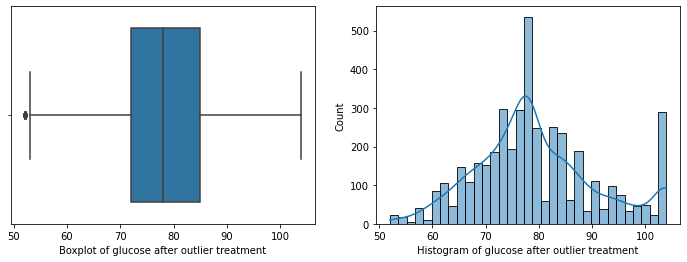

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='glucose', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of glucose after outlier treatment')
sns.histplot(x='glucose', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of glucose after outlier treatment')

In [118]:
data_work['glucose'].skew()

0.42564161112114735

In [119]:
outliers.clear()
outlier_detection('totChol')

{'count': 4240.0, 'mean': 236.6676886792453, 'std': 44.32847956803451, 'min': 107.0, '25%': 206.0, '50%': 234.0, '75%': 262.0, 'max': 696.0}
Q1 : 206.0
Q3 : 262.0
Inter quartile range is  56.0
The lower limit is  122
The upper limit is  346


In [120]:
data_work.loc[((data_work['totChol'] >= 348) & (data_work['totChol']  <= 696)), 'totChol'] = round(upper_lim)

In [121]:
data_work.loc[(data_work['totChol'] <= 120),'totChol'] = round(lower_lim)

Text(0.5, 0, 'Histogram of totChol after outlier treatment')

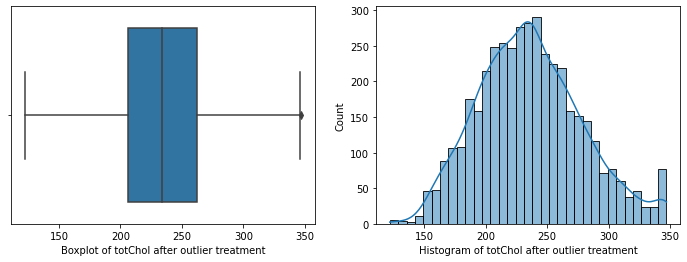

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='totChol', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of totChol after outlier treatment')
sns.histplot(x='totChol', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of totChol after outlier treatment')

In [123]:
data_work['totChol'].skew()

0.33112049839365454

In [124]:
outliers.clear()
outlier_detection('Blood_Pressure')

{'count': 4240.0, 'mean': 1.600320449222041, 'std': 0.1683690826452472, 'min': 1.162303664921466, '25%': 1.4893617021276595, '50%': 1.574468085106383, '75%': 1.68, 'max': 3.0634920634920637}
Q1 : 1.4893617021276595
Q3 : 1.68
Inter quartile range is  0.19063829787234043
The lower limit is  1
The upper limit is  2


In [125]:
data_work.loc[((data_work['Blood_Pressure'] >= 2) & (data_work['Blood_Pressure']  <= 3.0634920634920637)), 'Blood_Pressure'] = round(upper_lim)

Text(0.5, 0, 'Histogram of Blood Pressure after outlier treatment')

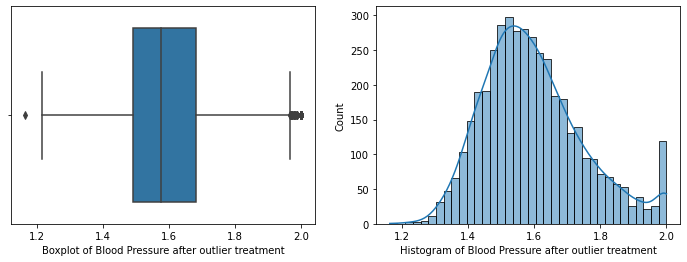

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='Blood_Pressure', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of Blood Pressure after outlier treatment')
sns.histplot(x='Blood_Pressure', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of Blood Pressure after outlier treatment')

In [127]:
data_work['Blood_Pressure'].skew()

0.6490631683981346

### After Outlier Treatment all features got almost normal distribution

In [128]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   male            4240 non-null   int64  
 1   age             4240 non-null   int64  
 2   education       4240 non-null   float64
 3   currentSmoker   4240 non-null   int64  
 4   cigsPerDay      4240 non-null   float64
 5   prevalentHyp    4240 non-null   int64  
 6   totChol         4240 non-null   float64
 7   BMI             4240 non-null   float64
 8   heartRate       4240 non-null   float64
 9   glucose         4240 non-null   float64
 10  CVD             4240 non-null   int64  
 11  Blood_Pressure  4240 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 397.6 KB


### education attribute seems to be a categorical column . But its datatype is float. So need to change its datatype

In [129]:
data_work['education'] = pd.Categorical(data_work['education'])

In [130]:
data_work['education']

C:\Users\rajde\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 4240, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

<AxesSubplot:xlabel='education', ylabel='count'>

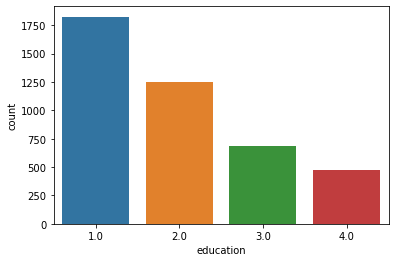

In [131]:
sns.countplot(x='education', data=data_work)

In [132]:
data_work['education'].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

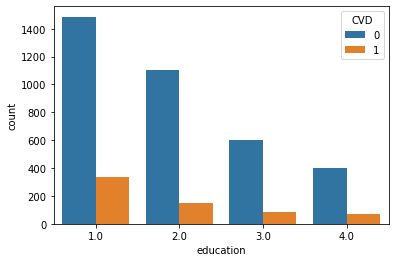

In [133]:
sns.countplot(x=data_work['education'], hue = data_work['CVD'],data=data_work)

In [134]:
data_work.head(5)

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,CVD,Blood_Pressure
0,1,39,4.0,0,0.0,0,195.0,26.97,80.0,77.0,0,1.514286
1,0,46,2.0,0,0.0,0,250.0,28.73,95.0,76.0,0,1.493827
2,1,48,1.0,1,20.0,0,245.0,25.34,75.0,70.0,0,1.593750
3,0,61,3.0,1,30.0,1,225.0,28.58,65.0,103.0,1,1.578947
4,0,46,3.0,1,23.0,0,285.0,23.10,85.0,85.0,0,1.547619


## Separating the Target and features

In [135]:
X = data_work.drop('CVD', axis=1)
y = data_work['CVD']

In [136]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,Blood_Pressure
0,1,39,4.0,0,0.0,0,195.0,26.97,80.0,77.0,1.514286
1,0,46,2.0,0,0.0,0,250.0,28.73,95.0,76.0,1.493827
2,1,48,1.0,1,20.0,0,245.0,25.34,75.0,70.0,1.593750
3,0,61,3.0,1,30.0,1,225.0,28.58,65.0,103.0,1.578947
4,0,46,3.0,1,23.0,0,285.0,23.10,85.0,85.0,1.547619


In [137]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: CVD, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [140]:
X_train

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,Blood_Pressure
4097,1,54,2.0,1,40.0,0,245.0,23.71,75.0,75.0,1.853659
3165,1,44,3.0,1,30.0,0,346.0,26.44,95.0,79.0,1.609195
2499,0,46,2.0,1,15.0,0,232.0,25.18,75.0,59.0,1.642857
3345,1,38,2.0,1,15.0,0,150.0,20.39,60.0,82.0,1.618421
3596,1,40,2.0,1,15.0,0,200.0,20.25,60.0,67.0,1.633333
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,1,222.0,26.79,76.0,71.0,1.563830
466,0,57,3.0,1,15.0,0,250.0,21.08,80.0,72.0,1.689189
3092,0,60,2.0,0,0.0,1,298.0,25.09,83.0,81.0,1.494382
3772,1,39,2.0,1,10.0,0,215.0,24.50,68.0,62.0,1.581395


In [141]:
y_train

4097    0
3165    0
2499    1
3345    0
3596    0
       ..
3444    0
466     0
3092    0
3772    0
860     0
Name: CVD, Length: 2968, dtype: int64

In [142]:
X_test

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,Blood_Pressure
1350,0,49,3.0,1,10.0,0,260.0,23.10,63.0,65.0,1.537500
1434,1,43,1.0,1,25.0,0,201.0,23.84,70.0,91.0,1.475610
2500,1,45,1.0,1,1.0,1,277.0,28.74,69.0,74.0,1.666667
1128,0,63,3.0,1,10.0,1,236.0,27.91,60.0,74.0,1.834951
4144,1,59,2.0,0,0.0,0,237.0,24.17,90.0,94.0,1.565476
...,...,...,...,...,...,...,...,...,...,...,...
1859,0,67,2.0,1,3.0,1,326.0,24.63,85.0,77.0,2.000000
3164,1,39,2.0,1,30.0,1,292.0,28.09,106.0,69.0,1.530000
610,1,55,2.0,1,15.0,1,222.0,28.35,67.0,68.0,1.675676
570,0,49,3.0,1,3.0,0,247.0,29.07,72.0,69.0,1.475610


In [143]:
y_test

1350    1
1434    0
2500    0
1128    0
4144    1
       ..
1859    0
3164    1
610     1
570     0
343     1
Name: CVD, Length: 1272, dtype: int64

In [144]:
y_train.value_counts(normalize=True)

0    0.84872
1    0.15128
Name: CVD, dtype: float64

In [145]:
y_test.value_counts(normalize=True)

0    0.846698
1    0.153302
Name: CVD, dtype: float64

In [146]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 4097 to 860
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   male            2968 non-null   int64   
 1   age             2968 non-null   int64   
 2   education       2968 non-null   category
 3   currentSmoker   2968 non-null   int64   
 4   cigsPerDay      2968 non-null   float64 
 5   prevalentHyp    2968 non-null   int64   
 6   totChol         2968 non-null   float64 
 7   BMI             2968 non-null   float64 
 8   heartRate       2968 non-null   float64 
 9   glucose         2968 non-null   float64 
 10  Blood_Pressure  2968 non-null   float64 
dtypes: category(1), float64(6), int64(4)
memory usage: 258.2 KB


## Preprocessing on Train Dataset

### Numerical column

In [147]:
X_train_num = X_train[['age','cigsPerDay','totChol','Blood_Pressure','BMI','heartRate','glucose']]

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()

In [150]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [151]:
X_train_num_scaled.shape

(2968, 7)

In [152]:
type(X_train_num_scaled)

numpy.ndarray

In [153]:
X_train_num_columns_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [154]:
X_train_num_columns_scaled_df.head()

,age,cigsPerDay,totChol,Blood_Pressure,BMI,heartRate,glucose
0,0.525340,2.638073,0.206902,1.703365,-0.531390,-0.076405,-0.390248
1,-0.646204,1.784400,2.640016,0.097626,0.193165,1.644818,-0.037067
2,-0.411896,0.503891,-0.106271,0.318731,-0.141245,-0.076405,-1.802969
3,-1.349131,0.503891,-2.081671,0.158224,-1.412534,-1.367323,0.227818
4,-1.114822,0.503891,-0.877159,0.256174,-1.449691,-1.367323,-1.096608


In [155]:
X_train_cat_already_hot_encoded = X_train[['male','currentSmoker','prevalentHyp']]

In [156]:
X_train_cat = X_train[['education']]

In [157]:
X_train_dummy = pd.get_dummies(X_train_cat, drop_first=True)

In [158]:
X_train_dummy.head(15)

,education_2.0,education_3.0,education_4.0
4097,1,0,0
3165,0,1,0
2499,1,0,0
3345,1,0,0
3596,1,0,0
2830,1,0,0
1940,0,0,1
1488,0,0,1
1448,1,0,0
1135,1,0,0


In [159]:
X_train_dummy.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [160]:
X_train_cat_already_hot_encoded.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [161]:
X_train_num_columns_scaled_df.index

RangeIndex(start=0, stop=2968, step=1)

In [162]:
X_train_num_columns_scaled_df.index = X_train_dummy.index

In [163]:
X_train_num_columns_scaled_df.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [164]:
## Concatenating three dataframes to create final train set
X_train_final = pd.concat([X_train_num_columns_scaled_df, X_train_dummy, X_train_cat_already_hot_encoded], axis=1)

In [165]:
X_train_final.head()

,age,cigsPerDay,totChol,Blood_Pressure,BMI,heartRate,glucose,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
4097,0.525340,2.638073,0.206902,1.703365,-0.531390,-0.076405,-0.390248,1,0,0,1,1,0
3165,-0.646204,1.784400,2.640016,0.097626,0.193165,1.644818,-0.037067,0,1,0,1,1,0
2499,-0.411896,0.503891,-0.106271,0.318731,-0.141245,-0.076405,-1.802969,1,0,0,0,1,0
3345,-1.349131,0.503891,-2.081671,0.158224,-1.412534,-1.367323,0.227818,1,0,0,1,1,0
3596,-1.114822,0.503891,-0.877159,0.256174,-1.449691,-1.367323,-1.096608,1,0,0,1,1,0


In [166]:
X_train_final.shape

(2968, 13)

## Preprocessing on Test Dataset

In [167]:
X_test_num = X_test[['age','cigsPerDay','totChol','Blood_Pressure','BMI','heartRate','glucose']]

In [168]:
X_test_num_scaled = scaler.transform(X_test_num)

In [169]:
X_test_num_scaled.shape

(1272, 7)

In [170]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

In [171]:
X_test_num_scaled_df.head()

,age,cigsPerDay,totChol,Blood_Pressure,BMI,heartRate,glucose
0,-0.060432,0.077055,0.568255,-0.373301,-0.693287,-1.109140,-1.273199
1,-0.763359,1.357564,-0.853069,-0.779822,-0.496888,-0.506711,1.022474
2,-0.529050,-0.691250,0.977789,0.475122,0.803596,-0.592772,-0.478543
3,1.579729,0.077055,-0.009910,1.580489,0.583310,-1.367323,-0.478543
4,1.111112,-0.776618,0.014180,-0.189541,-0.409304,1.214512,1.287359


In [172]:
X_test_cat_already_hot_encoded = X_test[['male','currentSmoker','prevalentHyp']]

In [173]:
X_test_cat = X_test[['education']]

In [174]:
X_test_dummy = pd.get_dummies(X_test_cat, drop_first=True)

In [175]:
X_test_dummy.head()

,education_2.0,education_3.0,education_4.0
1350,0,1,0
1434,0,0,0
2500,0,0,0
1128,0,1,0
4144,1,0,0


In [176]:
X_test_dummy.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [177]:
X_test_cat_already_hot_encoded.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [178]:
X_test_num_scaled_df.index

RangeIndex(start=0, stop=1272, step=1)

In [179]:
X_test_num_scaled_df.index = X_test_cat_already_hot_encoded.index

In [180]:
X_test_num_scaled_df.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [181]:
X_test_final = pd.concat([X_test_num_scaled_df, X_test_dummy, X_test_cat_already_hot_encoded], axis=1)

In [182]:
X_test_final.head()

,age,cigsPerDay,totChol,Blood_Pressure,BMI,heartRate,glucose,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
1350,-0.060432,0.077055,0.568255,-0.373301,-0.693287,-1.109140,-1.273199,0,1,0,0,1,0
1434,-0.763359,1.357564,-0.853069,-0.779822,-0.496888,-0.506711,1.022474,0,0,0,1,1,0
2500,-0.529050,-0.691250,0.977789,0.475122,0.803596,-0.592772,-0.478543,0,0,0,1,1,1
1128,1.579729,0.077055,-0.009910,1.580489,0.583310,-1.367323,-0.478543,0,1,0,0,1,1
4144,1.111112,-0.776618,0.014180,-0.189541,-0.409304,1.214512,1.287359,1,0,0,1,0,0


## Model Implementation

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Implementing K-Nearest Neighbour Classifier

In [184]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
knn_model = knn.fit(X_train_final , y_train)

## predicting the train set

In [185]:
y_pred_train = knn_model.predict(X_train_final)

In [186]:
accuracy_score(y_train,y_pred_train)

0.8891509433962265

## predicting the test set

In [187]:
y_pred_test_knn  = knn_model.predict(X_test_final)

In [188]:
accuracy_score(y_test,y_pred_test_knn)

0.8128930817610063

In [189]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [190]:
y_pred_test_knn[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Confusion Matrix

In [191]:
def Confusion_Matrix(x,y):
    cm = confusion_matrix(x,y)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    total = TN+FN+TP+FP
    
    print(cm)
    print('correctly specified percentage : ',(TN+TP)/total*100)
    print('Incorrectly specified percentage : ',(FN+FP)/total*100)
    print("Positive Prediction rate(Precision) : ",TP/(TP+FP))  # Positive prediction Rate
    print("Negative Prediction Rate : ",TN/(TN+FN))             # Negative Prediction Rate
    print("Sensitivity(Recall) :", TP/(TP+FN)) # Actually How much actual positive model predicted out of total actual positive
    print("Specificity :", TN/(FP+TN))     # Actually How much actual negative model predicted out of total actual negative

In [192]:
Confusion_Matrix(y_test, y_pred_test_knn)

[[1018   59]
 [ 179   16]]
correctly specified percentage :  81.28930817610063
Incorrectly specified percentage :  18.71069182389937
Positive Prediction rate(Precision) :  0.21333333333333335
Negative Prediction Rate :  0.8504594820384294
Sensitivity(Recall) : 0.08205128205128205
Specificity : 0.9452181987000928


In [193]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [194]:
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test_final))
knn_roc_auc

0.5136347403756873

In [195]:
f1_score(y_test, y_pred_test_knn, average='weighted')

0.7762506245978142

### As we can see that sensitivity of this classifier is quite low(approx 8.2%) i.e, it can identify only 8.2% True positive cases or in other words out of all actual positive cases it can identify only approx 8 people truly having cardio-viscular disease whereas its specificity is almost 95% which implies that it can identify 95% True Negative cases or in other words it can identify 95 people truly not having cardio-viscular disease out of all actual negative cases. It might be the class imbalance is leading to this issue. We might need to do resampling in order to get balanced class which may give us a better result.

In [196]:
#sns.heatmap(cm, annot=True, cmap = ListedColormap(['lightskyblue']), fmt='d', annot_kws={'size':20}, linewidths=0.8)

## Plotting Confusion Matrix

In [197]:
from sklearn.metrics import plot_confusion_matrix

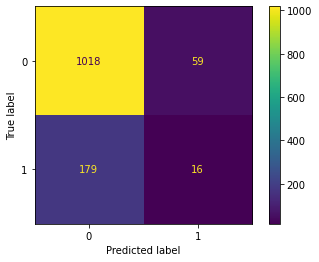

In [198]:
plot_confusion_matrix(knn_model, X_test_final, y_test)

# SMOTE (Synthetic Minority Oversampling Technique)
#### In this process new instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [199]:
from imblearn.over_sampling import SMOTE

In [200]:
sm = SMOTE(sampling_strategy='minority', random_state = 42)

In [201]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_final,y_train)

In [202]:
X_train_sm.head()

,age,cigsPerDay,totChol,Blood_Pressure,BMI,heartRate,glucose,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
0,0.525340,2.638073,0.206902,1.703365,-0.531390,-0.076405,-0.390248,1,0,0,1,1,0
1,-0.646204,1.784400,2.640016,0.097626,0.193165,1.644818,-0.037067,0,1,0,1,1,0
2,-0.411896,0.503891,-0.106271,0.318731,-0.141245,-0.076405,-1.802969,1,0,0,0,1,0
3,-1.349131,0.503891,-2.081671,0.158224,-1.412534,-1.367323,0.227818,1,0,0,1,1,0
4,-1.114822,0.503891,-0.877159,0.256174,-1.449691,-1.367323,-1.096608,1,0,0,1,1,0


In [203]:
y_train_sm.head()

0    0
1    0
2    1
3    0
4    0
Name: CVD, dtype: int64

In [204]:
print("length of oversampled data: ",len(X_train_sm))
print("length of oversampled data: ",len(y_train_sm))
#print("Number of no subscription in oversampled data",len(y_train_os[y_train_os['y']==0]))
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

length of oversampled data:  5038
length of oversampled data:  5038
Counter({0: 2519, 1: 449})
Counter({0: 2519, 1: 2519})


In [205]:
len(X_test_final), len(y_test)

(1272, 1272)

In [206]:
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
KNN_model = knn.fit(X_train_sm , y_train_sm)

### predicting the train set

In [207]:
y_pred_train_sm = KNN_model.predict(X_train_sm)
accuracy_score(y_train_sm, y_pred_train_sm)

0.9001587931718936

## predicting test set

In [208]:
y_pred_test_KNN = KNN_model.predict(X_test_final)
accuracy_score(y_test, y_pred_test_KNN)

0.6438679245283019

### Accuracy is 64% for the test set and 90% for train set, seems that the model has overfitted

In [209]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [210]:
y_pred_test_KNN[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

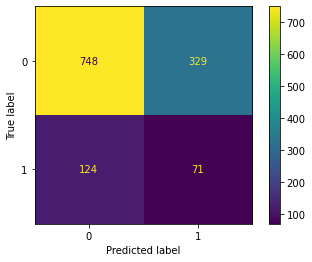

In [211]:
plot_confusion_matrix(KNN_model, X_test_final, y_test)

### Performance Metric of the model for K=3

In [212]:
Confusion_Matrix(y_test, y_pred_test_KNN)

[[748 329]
 [124  71]]
correctly specified percentage :  64.38679245283019
Incorrectly specified percentage :  35.613207547169814
Positive Prediction rate(Precision) :  0.1775
Negative Prediction Rate :  0.8577981651376146
Sensitivity(Recall) : 0.3641025641025641
Specificity : 0.6945218198700093


### we can see that the Sensitivity has been increased from 9.7% to 36.41% i.e,  i.e, it can identify almost 36 people truly having Cardio viscular disease out of all people actually having CVD and Specificity is 69.45% i.e, out of all people who are actually not having CVD, 69 people can be identified by the classifier.

In [213]:
from sklearn.metrics import precision_score, recall_score

In [214]:
def classification_metrics(x,y):
    print("Precision score is: ", precision_score(x,y))
    print("Recall score is: ", recall_score(x,y))
    print("F1 score is: ", f1_score(x,y, average='weighted'))

In [215]:
classification_metrics(y_test, y_pred_test_KNN)

Precision score is:  0.1775
Recall score is:  0.3641025641025641
F1 score is:  0.6864890403725311


### The model's precision is low i.e, positive prediction rate is low.

In [216]:
f1_score(y_test,y_pred_test_KNN,average='weighted')

0.6864890403725311

### Classification Report for the test set

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_KNN))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1077
           1       0.18      0.36      0.24       195

    accuracy                           0.64      1272
   macro avg       0.52      0.53      0.50      1272
weighted avg       0.75      0.64      0.69      1272



In [218]:
knn_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test_final)[:,1])

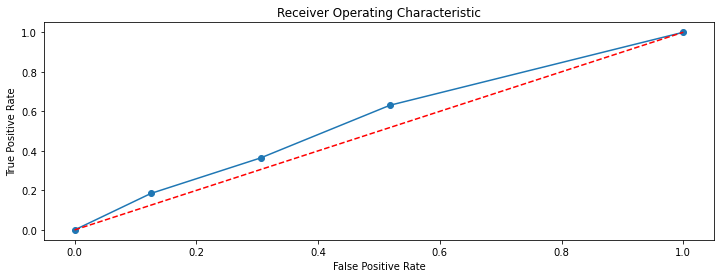

In [219]:
plt.figure(figsize=(12,4))
plt.plot(fpr, tpr, marker = 'o')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [220]:
print("The AUC ROC score is: ",knn_roc_auc)

The AUC ROC score is:  0.5293121919862867


In [221]:
y_pred_prob = KNN_model.predict_proba(X_test_final)

In [222]:
y_pred_prob[:]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ]])

## Finding for best value of K

In [223]:
iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))
validation_error = []
for i in range(1, iter_size):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_sm, y_train_sm)
    pred_i = knn_classifier.predict(X_test_final)
    #print(pred_i)
    validation_error.append(np.mean(pred_i != y_test))
    #print(validation_error)
print("The minimum error we get is ", min(validation_error))
print("The corresponding K value is ", 1+validation_error.index(min(validation_error)))

The minimum error we get is  0.2562893081761006
The corresponding K value is  2


## Elbow Curve for KNN

Text(0, 0.5, 'Validation Error Rate')

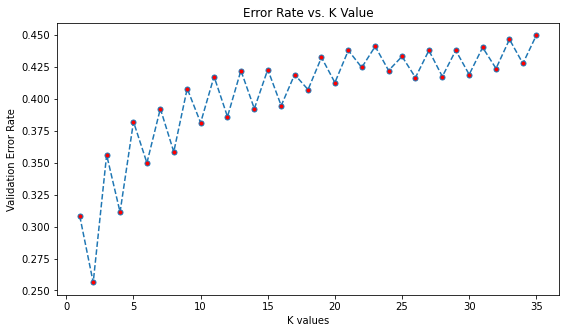

In [224]:
plt.figure(figsize=(9,5))
plt.plot(range(1, iter_size), validation_error, linestyle='dashed', marker = 'o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Validation Error Rate')

### Though from the graph we can see that at k=2 the error is lowest but increasing the value of k can lead to high error. 


### Checking with k=2

In [225]:
KNN_2 = KNeighborsClassifier(n_neighbors=2).fit(X_train_sm, y_train_sm)

### Performance Metric of the model of K=2

In [226]:
y_pred_2_train = KNN_2.predict(X_train_final)
y_pred_2_test = KNN_2.predict(X_test_final)
Confusion_Matrix(y_test, y_pred_2_test)
classification_metrics(y_test, y_pred_2_test)

[[896 181]
 [145  50]]
correctly specified percentage :  74.37106918238993
Incorrectly specified percentage :  25.628930817610062
Positive Prediction rate(Precision) :  0.21645021645021645
Negative Prediction Rate :  0.8607108549471661
Sensitivity(Recall) : 0.2564102564102564
Specificity : 0.8319405756731661
Precision score is:  0.21645021645021645
Recall score is:  0.2564102564102564
F1 score is:  0.7523617214180013


In [227]:
accuracy_score(y_train, y_pred_2_train)

0.9962938005390836

In [228]:
accuracy_score(y_test, y_pred_2_test)

0.7437106918238994

In [229]:
f1_score(y_test,y_pred_2_test,average='weighted')

0.7523617214180013

In [230]:
f1_score(y_train,y_pred_2_train,average='weighted')

0.9962748568497285

In [231]:
knn_2_roc_auc = roc_auc_score(y_test, KNN_2.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, KNN_2.predict_proba(X_test_final)[:,1])

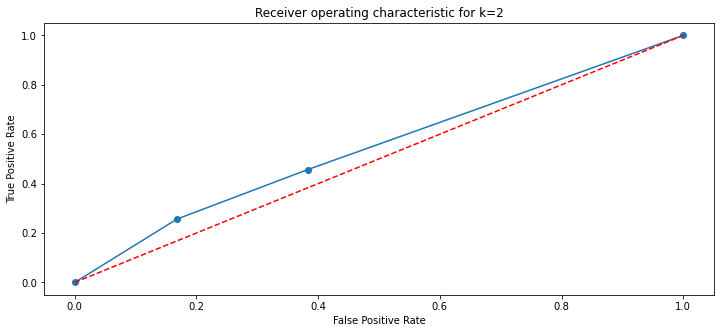

In [232]:
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for k=2')
plt.show()

In [233]:
print('AUC ROC score is :' ,knn_2_roc_auc)

AUC ROC score is : 0.5441754160417113


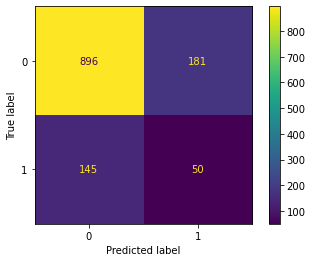

In [234]:
plot_confusion_matrix(KNN_2, X_test_final, y_test)

In [235]:
print(classification_report(y_train, y_pred_2_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2519
           1       1.00      0.98      0.99       449

    accuracy                           1.00      2968
   macro avg       1.00      0.99      0.99      2968
weighted avg       1.00      1.00      1.00      2968



In [236]:
print(classification_report(y_test, y_pred_2_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1077
           1       0.22      0.26      0.23       195

    accuracy                           0.74      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.74      0.75      1272



### For k=2, it doesn't seem to be a good model as the sensitivity i.e, True Positive Prediction rate is low than the earlier model but accuracy has been improved for test set. 

In [237]:
Accuracy = []
for i in range(1, iter_size):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_sm,y_train_sm)
    y_pred_i = knn_i.predict(X_test_final)
    Accuracy.append(accuracy_score(y_test, y_pred_i))

Text(0, 0.5, 'Testing Accuracy')

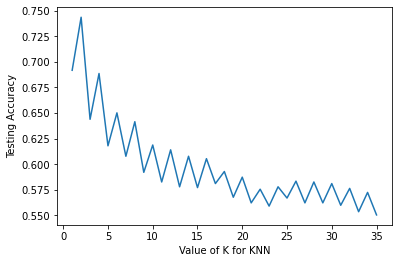

In [238]:
plt.plot(range(1,iter_size), Accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Looking at the scores we can't say that KNN is a good model for this problem

## Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
lr = LogisticRegression()

# Training the model
lr_model = lr.fit(X_train_sm , y_train_sm)

In [241]:
y_pred_train_lr = lr_model.predict(X_train_sm)

In [242]:
accuracy_score(y_train_sm, y_pred_train_lr)

0.7088130210400952

## predicting the test set

In [243]:
y_pred_test_lr  = lr_model.predict(X_test_final)

In [244]:
accuracy_score(y_test,y_pred_test_lr)

0.6666666666666666

## Confusion Matrix

In [245]:
Confusion_Matrix(y_test, y_pred_test_lr)

[[741 336]
 [ 88 107]]
correctly specified percentage :  66.66666666666666
Incorrectly specified percentage :  33.33333333333333
Positive Prediction rate(Precision) :  0.24153498871331827
Negative Prediction Rate :  0.893848009650181
Sensitivity(Recall) : 0.5487179487179488
Specificity : 0.6880222841225627


In [246]:
classification_metrics(y_test, y_pred_test_lr)

Precision score is:  0.24153498871331827
Recall score is:  0.5487179487179488
F1 score is:  0.7097665514280921


### In this model, the Recall or True Positive Rate is increased. So , we can say that , out of all actully cardio viscular diseased people, 54 people can be identified by the model.  F1 score is almost in the same range as with the previous KNN models with k=3 and k=2 

In [247]:
#sns.heatmap(cm, annot=True, cmap = ListedColormap(['lightskyblue']), fmt='d', annot_kws={'size':20}, linewidths=0.8)

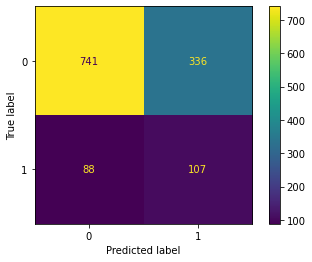

In [248]:
plot_confusion_matrix(lr_model, X_test_final, y_test)

### Classification Report for Logistoc Regression

In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1077
           1       0.24      0.55      0.34       195

    accuracy                           0.67      1272
   macro avg       0.57      0.62      0.56      1272
weighted avg       0.79      0.67      0.71      1272



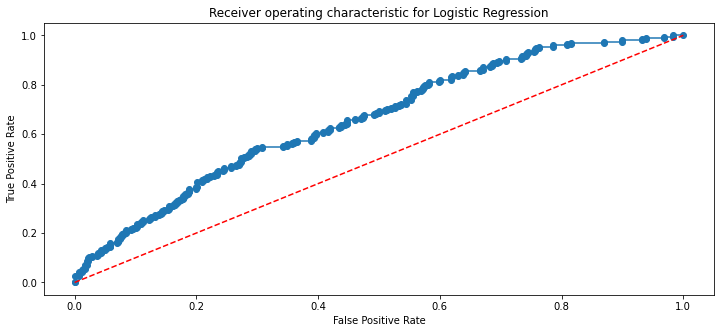

In [250]:
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_final)[:,1])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.show()

In [251]:
print("The AUC ROC score is: ",logit_roc_auc)

The AUC ROC score is:  0.6183701164202557


## Decision Tree Classifier

In [252]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
DT_train_accuracy = []
DT_test_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_sm, y_train_sm)
    DT_train_accuracy.append(dt_model.score(X_train_sm, y_train_sm))
    DT_test_accuracy.append(dt_model.score(X_test_final, y_test))

In [254]:
DT_frame = pd.DataFrame({'max_depth': range(1,15), 'train_accuracy': DT_train_accuracy, 'test_accuracy': DT_test_accuracy})

In [255]:
DT_frame

,max_depth,train_accuracy,test_accuracy
0,1,0.651647,0.507862
1,2,0.676062,0.560535
2,3,0.697896,0.661164
3,4,0.723501,0.643868
4,5,0.739778,0.664308
5,6,0.753474,0.632075
6,7,0.779277,0.636792
7,8,0.805280,0.650157
8,9,0.827511,0.643082
9,10,0.849543,0.636792


### With increasing depth of the tree, the test accuracy is decreasing and train accuracy is increasing. As Decision Tree is high variance and low bias so it has a high chance to be overfitted when it will grow up to full length. So, we are taking max_depth = 3 for Decision Tree for further process as with this max_depth the difference between the train and test accuracy is lesser than all other

In [256]:
Dec_Tree = DecisionTreeClassifier(max_depth = 3)

In [257]:
Dec_Tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3)

## Predicting Train set

In [258]:
y_pred_train_tree = Dec_Tree.predict(X_train_sm)

In [259]:
accuracy_score(y_train_sm, y_pred_train_tree)

0.6978959904724097

In [260]:
y_pred_train_tree[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

## Predicting Test Set

In [261]:
y_pred_test_tree = Dec_Tree.predict(X_test_final)

In [262]:
accuracy_score(y_test, y_pred_test_tree)

0.6611635220125787

In [263]:
y_test[:20]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
642     0
3331    0
1613    1
3134    0
3378    0
2793    1
3317    0
2067    0
862     0
843     0
Name: CVD, dtype: int64

In [264]:
y_pred_test_tree[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

## Confusion Matrix

In [265]:
Confusion_Matrix(y_test, y_pred_test_tree)

[[737 340]
 [ 91 104]]
correctly specified percentage :  66.11635220125787
Incorrectly specified percentage :  33.88364779874214
Positive Prediction rate(Precision) :  0.23423423423423423
Negative Prediction Rate :  0.8900966183574879
Sensitivity(Recall) : 0.5333333333333333
Specificity : 0.6843082636954503


In [266]:
classification_metrics(y_test, y_pred_test_tree)

Precision score is:  0.23423423423423423
Recall score is:  0.5333333333333333
F1 score is:  0.7050365266260399


### We can see above that, Recall or Sensitivity of Decision Tree Model (max_depth=3) is 0.53. i.e, This model can identify approx 53 person out of all people who have actually cardio viscualr disease actual cardio viscular disease. In other hand its precision is quite low. i.e, its positive prediction power is low (approximately 23%)

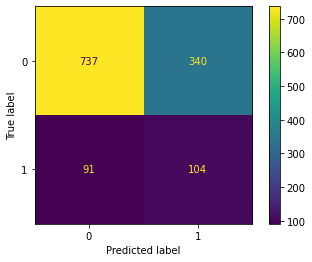

In [267]:
plot_confusion_matrix(Dec_Tree, X_test_final, y_test)

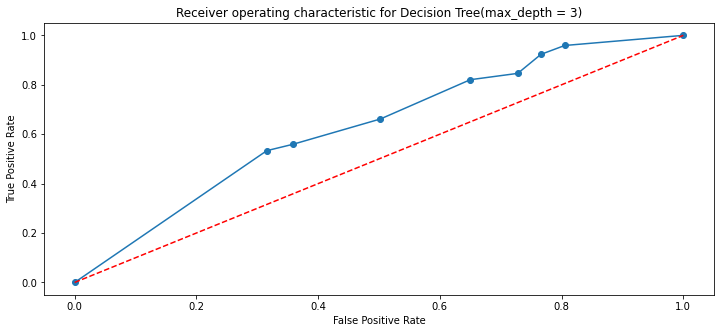

In [268]:
DT_roc_auc = roc_auc_score(y_test, Dec_Tree.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, Dec_Tree.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree(max_depth = 3)')
plt.show()

In [269]:
print("The AUC ROC score is: ",DT_roc_auc)

The AUC ROC score is:  0.6088207985143919


## Random Forest Classifier

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [271]:
forest_classifier = RandomForestClassifier()

In [272]:
forest_classifier.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

### Predicting the train set

In [273]:
y_train_pred_forest = forest_classifier.predict(X_train_sm)

In [274]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [275]:
y_train_pred_forest[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Predicting the test set

In [276]:
y_test_pred_forest = forest_classifier.predict(X_test_final)

In [277]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [278]:
y_test_pred_forest[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

#### Checking Accuracy score for train and test set

In [279]:
accuracy_score(y_train_sm, y_train_pred_forest)

1.0

In [280]:
accuracy_score(y_test, y_test_pred_forest)

0.7806603773584906

In [281]:
Confusion_Matrix(y_test, y_test_pred_forest)

[[956 121]
 [158  37]]
correctly specified percentage :  78.06603773584906
Incorrectly specified percentage :  21.933962264150946
Positive Prediction rate(Precision) :  0.23417721518987342
Negative Prediction Rate :  0.8581687612208259
Sensitivity(Recall) : 0.18974358974358974
Specificity : 0.8876508820798514


In [282]:
classification_metrics(y_test, y_test_pred_forest)

Precision score is:  0.23417721518987342
Recall score is:  0.18974358974358974
F1 score is:  0.7710172646133573


### The Recall or Sensitivity score i.e, True Positive prediction rate has been decreased than before. F1 score has been increased, Accuracy has been increased

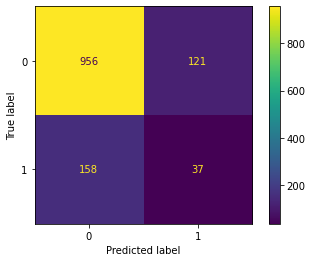

In [283]:
plot_confusion_matrix(forest_classifier, X_test_final, y_test)

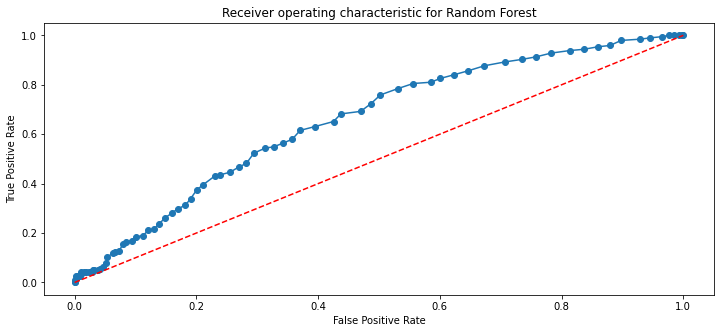

In [284]:
forest_roc_auc = roc_auc_score(y_test, forest_classifier.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, forest_classifier.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.show()

In [285]:
roc_auc_score(y_test, forest_classifier.predict(X_test_final))

0.5386972359117206

In [286]:
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1077
           1       0.23      0.19      0.21       195

    accuracy                           0.78      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.76      0.78      0.77      1272



### Hyperparameter Tuning for Random Forest

In [293]:
from pprint import pprint

In [288]:
print('Parameters currently in use:\n')
pprint(forest_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [289]:
X_train_sm.shape

(5038, 13)

## Changing the Max_depth of the tree in Random Forest

In [290]:
rf_train_accuracy = []
rf_test_accuracy = []
for depth in range(1,25):
    rf_model = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_model.fit(X_train_sm, y_train_sm)
    rf_train_accuracy.append(rf_model.score(X_train_sm, y_train_sm))
    rf_test_accuracy.append(rf_model.score(X_test_final, y_test))

In [291]:
RF_frame = pd.DataFrame({'max_depth': range(1,25), 'train_accuracy': rf_train_accuracy, 'test_accuracy': rf_test_accuracy})

In [292]:
RF_frame

,max_depth,train_accuracy,test_accuracy
0,1,0.681620,0.603774
1,2,0.700476,0.643868
2,3,0.714172,0.678459
3,4,0.728067,0.683176
4,5,0.737396,0.692610
5,6,0.773720,0.698899
6,7,0.811036,0.702830
7,8,0.844383,0.709906
8,9,0.873561,0.709119
9,10,0.897380,0.718553


### From max_depth 17 onwards The tree is getting overfitted as the train accuracy is almost near to 100% whereas on test set the accuracy is near 80%

## Performing Random search for finding best parameter

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [299]:
param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 800, num = 20)], 
               'max_features':[4,6], 'min_samples_split': [4,6,8], 'min_samples_leaf': [2,4,6,8],
               'bootstrap': [True, False],'criterion': ['gini'],
               'max_depth':[int(x) for x in np.linspace(start = 3, stop = 18, num = 10)]}]

Forest_Classifier_model = RandomForestClassifier(random_state = 42)
random_search = RandomizedSearchCV(Forest_Classifier_model, param_grid, cv=5, scoring = 'recall')

In [301]:
random_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['gini'],
                                         'max_depth': [3, 4, 6, 8, 9, 11, 13,
                                                       14, 16, 18],
                                         'max_features': [4, 6],
                                         'min_samples_leaf': [2, 4, 6, 8],
                                         'min_samples_split': [4, 6, 8],
                                         'n_estimators': [100, 136, 173, 210,
                                                          247, 284, 321, 357,
                                                          394, 431, 468, 505,
                                                          542, 578, 615, 652,
                                                          689, 726, 763,
                                               

In [302]:
# Fit the random search model
random_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['gini'],
                                         'max_depth': [3, 4, 6, 8, 9, 11, 13,
                                                       14, 16, 18],
                                         'max_features': [4, 6],
                                         'min_samples_leaf': [2, 4, 6, 8],
                                         'min_samples_split': [4, 6, 8],
                                         'n_estimators': [100, 136, 173, 210,
                                                          247, 284, 321, 357,
                                                          394, 431, 468, 505,
                                                          542, 578, 615, 652,
                                                          689, 726, 763,
                                               

In [303]:
random_search.best_params_

{'n_estimators': 247,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 6,
 'max_depth': 18,
 'criterion': 'gini',
 'bootstrap': True}

In [304]:
best_model = random_search.best_estimator_

In [305]:
best_model

RandomForestClassifier(max_depth=18, max_features=6, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=247, random_state=42)

### Predicting The Train Set

In [306]:
y_train_pred_best_model = best_model.predict(X_train_sm)

In [307]:
y_train_pred_best_model[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [308]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [309]:
accuracy_score(y_train_sm, y_train_pred_best_model)

0.9894799523620484

In [310]:
classification_metrics(y_train_sm, y_train_pred_best_model)

Precision score is:  0.9839089481946625
Recall score is:  0.9952362048431918
F1 score is:  0.9894796037745834


### Predicting Test Set

In [311]:
y_test_pred_best_model = best_model.predict(X_test_final)

In [312]:
y_test_pred_best_model[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [313]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [314]:
accuracy_score(y_test_pred_best_model, y_test)

0.7555031446540881

In [315]:
Confusion_Matrix(y_test, y_test_pred_best_model)

[[914 163]
 [148  47]]
correctly specified percentage :  75.5503144654088
Incorrectly specified percentage :  24.449685534591197
Positive Prediction rate(Precision) :  0.22380952380952382
Negative Prediction Rate :  0.8606403013182674
Sensitivity(Recall) : 0.24102564102564103
Specificity : 0.8486536675951718


### Accuracy for test set is high than previous models , sensitivity is poor but specificity is high

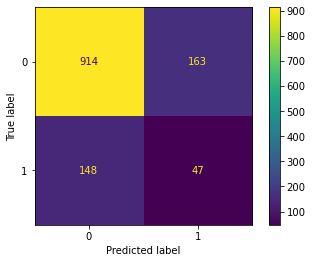

In [316]:
plot_confusion_matrix(best_model, X_test_final, y_test)

In [317]:
classification_metrics(y_test, y_test_pred_best_model)

Precision score is:  0.22380952380952382
Recall score is:  0.24102564102564103
F1 score is:  0.7591735820960375


In [318]:
print(classification_report(y_test, y_test_pred_best_model))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1077
           1       0.22      0.24      0.23       195

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.76      0.76      1272



### ROC curve 

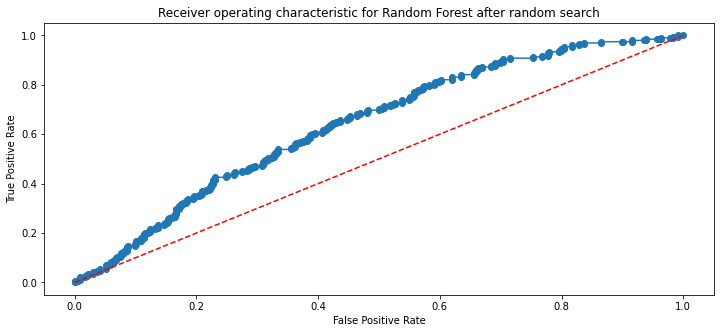

In [319]:
best_model_roc_auc = roc_auc_score(y_test, best_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest after random search')
plt.show()

In [320]:
print("The AUC ROC score for Random Forest with best parameter is: ",best_model_roc_auc )

The AUC ROC score for Random Forest with best parameter is:  0.5448396543104064


In [321]:
from sklearn.model_selection import cross_val_score

In [322]:
best_model_hpt_accuracy_train = cross_val_score(best_model, X_train_sm, y_train_sm, cv = 5, scoring = 'accuracy')

In [369]:
best_model_hpt_accuracy_train

array([0.7202381 , 0.88789683, 0.8531746 , 0.86097319, 0.86593843])

In [323]:
print("Train accuracy after hyper parameter tuning and 5 fold cross validation: ", np.mean(best_model_hpt_accuracy_train))

Train accuracy after hyper parameter tuning and 5 fold cross validation:  0.8584858372345959


In [324]:
best_model_hpt_accuracy_test = cross_val_score(best_model, X_test_final, y_test, cv = 5, scoring = 'accuracy')

In [325]:
best_model_hpt_accuracy_test

array([0.83137255, 0.83921569, 0.84645669, 0.83464567, 0.8503937 ])

In [326]:
print("Test accuracy after hyper parameter tuning and 5 fold cross validation: ", np.mean(best_model_hpt_accuracy_test))

Test accuracy after hyper parameter tuning and 5 fold cross validation:  0.8404168596572488


## Ada Boost Classifier

In [327]:
from sklearn.ensemble import AdaBoostClassifier

In [333]:
ada_model = AdaBoostClassifier(base_estimator=(DecisionTreeClassifier(max_depth = 1)))

In [334]:
# Training the model
ada_model = ada_model.fit(X_train_sm , y_train_sm)

In [335]:
y_pred_train_ada_model = ada_model.predict(X_train_sm)

In [336]:
accuracy_score(y_train_sm, y_pred_train_ada_model)

0.7558554982135768

## predicting the test set

In [337]:
y_pred_test_ada_model  = ada_model.predict(X_test_final)

accuracy_score(y_test, y_pred_test_ada_model)

0.6839622641509434

## Confusion Matrix

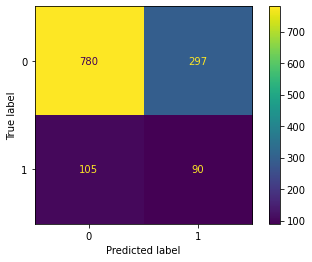

In [338]:
plot_confusion_matrix(ada_model, X_test_final, y_test)

In [339]:
Confusion_Matrix(y_test, y_pred_test_ada_model)

[[780 297]
 [105  90]]
correctly specified percentage :  68.39622641509435
Incorrectly specified percentage :  31.60377358490566
Positive Prediction rate(Precision) :  0.23255813953488372
Negative Prediction Rate :  0.8813559322033898
Sensitivity(Recall) : 0.46153846153846156
Specificity : 0.724233983286908


### Accuracy drpped from the Random Forest Model vut sensitivity or True Positive prediction rate has been increased

In [340]:
classification_metrics(y_test, y_pred_test_ada_model)

Precision score is:  0.23255813953488372
Recall score is:  0.46153846153846156
F1 score is:  0.7206285798583908


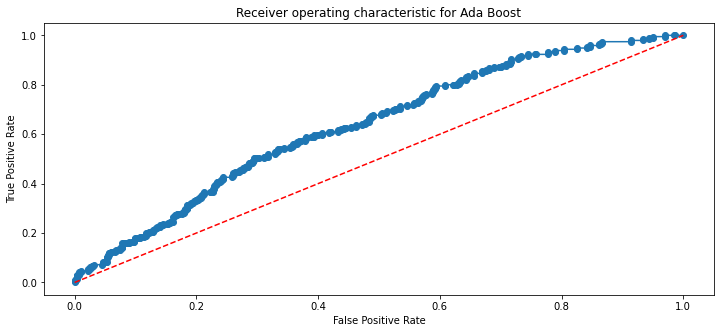

In [341]:
adaboost_model_roc_auc = roc_auc_score(y_test, ada_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, ada_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Ada Boost')
plt.show()

In [342]:
print("The AUC ROC score of Ada Boost: ", adaboost_model_roc_auc)

The AUC ROC score of Ada Boost:  0.5928862224126848


In [343]:
print('Parameters currently in use:\n')
pprint(ada_model.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


#### Ada Boost uses a series of weak learners and gives more preferences on the misclassified points. 

In [363]:
L = range(5,100)
score = []

In [364]:
for i in L:
    ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                                n_estimators = i,
                                learning_rate = 0.5,
                                random_state = 42)
    ada_clf.fit(X_train_sm, y_train_sm)
    ada_clf_test_score = accuracy_score(y_test, ada_clf.predict(X_test_final))
#    print("The n_estimator value is :", i)
#    print("The accurcay is: ", ada_clf_test_score)
    score.append(ada_clf_test_score)
print("The highest value of accuracy score: ",max(score))
print("The value of n_estimators: ",score.index(max(score)))

The highest value of accuracy score:  0.6816037735849056
The value of n_estimators:  84


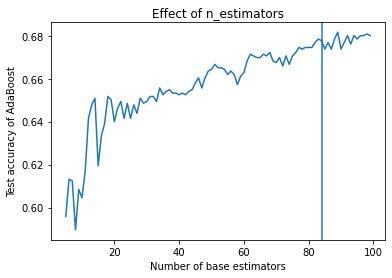

In [368]:
plt.title("Effect of n_estimators")
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.axvline(84)
plt.plot(L, score)

In [379]:
R = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
acc_score = []
for i in R:
    ada_clf_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                                n_estimators = 84,
                                learning_rate = i,
                                random_state = 42)
    ada_clf_model.fit(X_train_sm, y_train_sm)
    ada_clf_model_score = accuracy_score(y_test, ada_clf_model.predict(X_test_final))
    acc_score.append(ada_clf_model_score)
    print("The learning rate value is :", i)
    print("The accuracy is: ", ada_clf_model_score)
print("The highest value of accuracy score is :", max(acc_score))
print("The value of learning Rate is: ", R[acc_score.index(max(acc_score))])


The learning rate value is : 0.1
The accuracy is:  0.654874213836478
The learning rate value is : 0.2
The accuracy is:  0.6580188679245284
The learning rate value is : 0.3
The accuracy is:  0.6674528301886793
The learning rate value is : 0.4
The accuracy is:  0.6745283018867925
The learning rate value is : 0.5
The accuracy is:  0.6776729559748428
The learning rate value is : 0.6
The accuracy is:  0.6816037735849056
The learning rate value is : 0.7
The accuracy is:  0.6823899371069182
The learning rate value is : 0.8
The accuracy is:  0.6926100628930818
The learning rate value is : 0.9
The accuracy is:  0.690251572327044
The learning rate value is : 1.0
The accuracy is:  0.6816037735849056
The highest value of accuracy score is : 0.6926100628930818
The value of learning Rate is:  0.8


In [380]:
ada_tuned_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                                    n_estimators = 84,
                                    learning_rate = 0.8,
                                    random_state = 42)


In [382]:
ada_tuned = ada_tuned_model.fit(X_train_sm, y_train_sm)

### Predicting Train set

In [384]:
y_pred_tuned_ada = ada_tuned.predict(X_train_sm)

In [386]:
y_pred_tuned_ada[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [387]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [388]:
accuracy_score(y_train_sm, y_pred_tuned_ada)

0.7635966653433902

In [389]:
Confusion_Matrix(y_train_sm, y_pred_tuned_ada)

[[1840  679]
 [ 512 2007]]
correctly specified percentage :  76.35966653433903
Incorrectly specified percentage :  23.640333465660976
Positive Prediction rate(Precision) :  0.7472077438570365
Negative Prediction Rate :  0.782312925170068
Sensitivity(Recall) : 0.796744739976181
Specificity : 0.7304485907105994


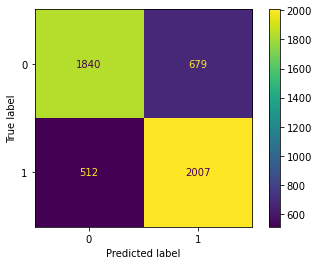

In [414]:
plot_confusion_matrix(ada_tuned, X_train_sm, y_train_sm)

### Predicting Test Set

In [391]:
y_pred_test_ada = ada_tuned.predict(X_test_final)

In [392]:
y_pred_test_ada[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [393]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

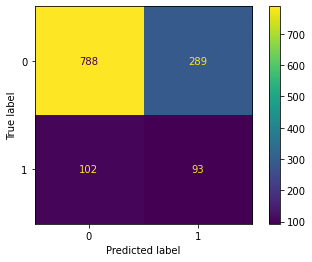

In [420]:
plot_confusion_matrix(ada_tuned, X_test_final, y_test)

In [416]:
Confusion_Matrix(y_test, y_pred_test_ada)

[[788 289]
 [102  93]]
correctly specified percentage :  69.26100628930818
Incorrectly specified percentage :  30.738993710691826
Positive Prediction rate(Precision) :  0.24345549738219896
Negative Prediction Rate :  0.8853932584269663
Sensitivity(Recall) : 0.47692307692307695
Specificity : 0.7316620241411328


In [417]:
classification_metrics(y_test, y_pred_test_ada)

Precision score is:  0.24345549738219896
Recall score is:  0.47692307692307695
F1 score is:  0.7278095134248636


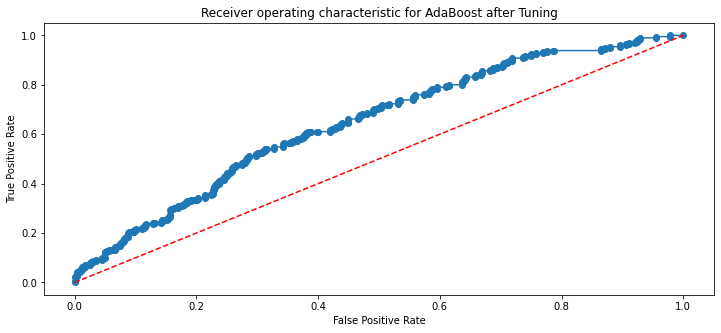

In [428]:
ada_tuned_roc_auc = roc_auc_score(y_test, ada_tuned_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, ada_tuned_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for AdaBoost after Tuning')
plt.show()

In [429]:
ada_tuned_roc_auc

0.604292550532105

In [399]:
hyperparameter_space = {'n_estimators':list(range(2, 102, 2)), 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 1),
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space, 
                  scoring="recall", cv=5)

gs.fit(X_train_sm, y_train_sm)
print("Optimal hyperparameter combination:", gs.best_params_)

Optimal hyperparameter combination: {'learning_rate': 0.1, 'n_estimators': 4}


In [401]:
ada_best_tuned_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                                         learning_rate = 0.1,
                                         n_estimators = 4, random_state = 42)

### Predicting Train Set

In [403]:

ada_best_tuned_model = ada_best_tuned_model.fit(X_train_sm, y_train_sm)

In [404]:
y_train_pred_ada_grid = ada_best_tuned_model.predict(X_train_sm)

In [405]:
y_train_pred_ada_grid[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [407]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [408]:
accuracy_score(y_train_sm, y_train_pred_ada_grid)

0.6581976974990076

### Predicting Test Set

In [409]:
y_test_pred_ada_grid = ada_best_tuned_model.predict(X_test_final)

In [410]:
accuracy_score(y_test, y_test_pred_ada_grid)

0.5550314465408805

In [411]:
classification_metrics(y_test, y_test_pred_ada_grid)

Precision score is:  0.21505376344086022
Recall score is:  0.717948717948718
F1 score is:  0.6152036219278292


In [422]:
Confusion_Matrix(y_test, y_test_pred_ada_grid)

[[566 511]
 [ 55 140]]
correctly specified percentage :  55.503144654088054
Incorrectly specified percentage :  44.49685534591195
Positive Prediction rate(Precision) :  0.21505376344086022
Negative Prediction Rate :  0.9114331723027376
Sensitivity(Recall) : 0.717948717948718
Specificity : 0.5255338904363974


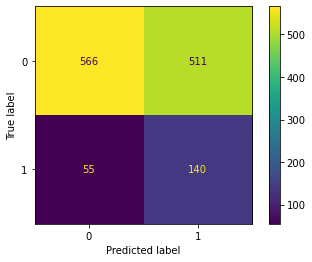

In [423]:
plot_confusion_matrix(ada_best_tuned_model, X_test_final, y_test)

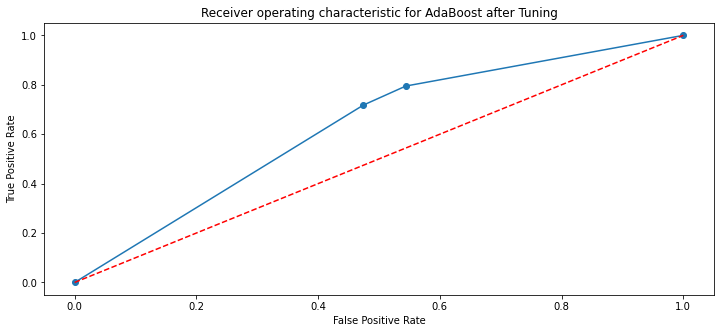

In [426]:
ada_best_tuned_model_roc_auc = roc_auc_score(y_test, ada_best_tuned_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, ada_best_tuned_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for AdaBoost after Tuning')
plt.show()

In [427]:
ada_best_tuned_model_roc_auc

0.6217413041925577

### After Hyperparameter Tuning Adaboost is giving highest Recall or sensitivity i.e, True Positive Prediction rate is highest though the accuracy is low for test set. The Recall is 0.71 and accuracy is 55.50%